In [4]:
import pandas as pd
import matplotlib.pyplot as plt

In [5]:
#data={'Транзакция': [1,2,3,4,5], 'Кола':[1,0,1,1,0], 'Пиво':[1,0,1,1,1],'Подгузники':[1,0,0,1,1]}

df=pd.read_csv('Market_Basket_Optimisation.csv')
#df=pd.read_csv('data.csv')

In [6]:
df.head()

,shrimp,almonds,avocado,vegetables mix,green grapes,whole weat flour,yams,cottage cheese,energy drink,tomato juice,low fat yogurt,green tea,honey,salad,mineral water,salmon,antioxydant juice,frozen smoothie,spinach,olive oil
0,burgers,meatballs,eggs,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,chutney,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,turkey,avocado,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,mineral water,milk,energy bar,whole wheat rice,green tea,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,low fat yogurt,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7500 entries, 0 to 7499
Data columns (total 20 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   shrimp             7500 non-null   object 
 1   almonds            5746 non-null   object 
 2   avocado            4388 non-null   object 
 3   vegetables mix     3344 non-null   object 
 4   green grapes       2528 non-null   object 
 5   whole weat flour   1863 non-null   object 
 6   yams               1368 non-null   object 
 7   cottage cheese     980 non-null    object 
 8   energy drink       653 non-null    object 
 9   tomato juice       394 non-null    object 
 10  low fat yogurt     255 non-null    object 
 11  green tea          153 non-null    object 
 12  honey              86 non-null     object 
 13  salad              46 non-null     object 
 14  mineral water      24 non-null     object 
 15  salmon             7 non-null      object 
 16  antioxydant juice  3 non

In [8]:
df.stack().value_counts()

mineral water    1787
eggs             1348
spaghetti        1306
french fries     1282
chocolate        1230
                 ... 
bramble            14
cream               7
napkins             5
water spray         3
 asparagus          1
Length: 120, dtype: int64

In [9]:
df.stack().value_counts(normalize=True)

mineral water    0.060900
eggs             0.045939
spaghetti        0.044508
french fries     0.043690
chocolate        0.041918
                   ...   
bramble          0.000477
cream            0.000239
napkins          0.000170
water spray      0.000102
 asparagus       0.000034
Length: 120, dtype: float64

<AxesSubplot: >

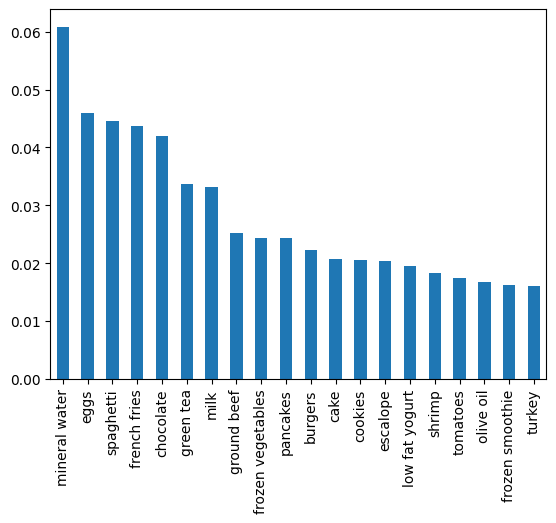

In [10]:
df.stack().value_counts(normalize=True)[:20].plot(kind='bar') #Относительная частота

<AxesSubplot: >

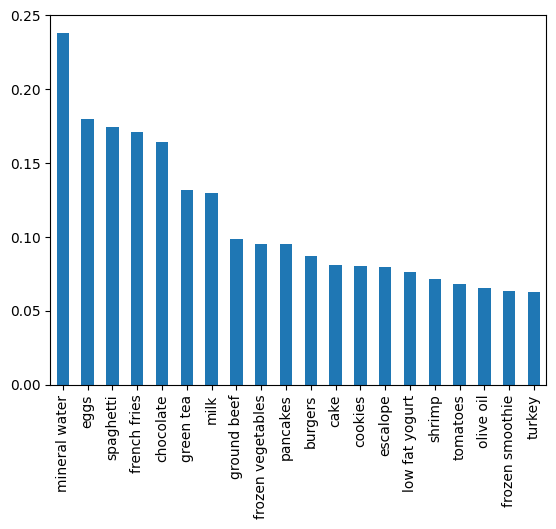

In [11]:
df.stack().value_counts().apply(lambda item: item /df.shape[0])[:20].plot(kind='bar') #Фактическая частота

In [12]:
transactions=[]
for i in range(df.shape[0]):
    row=df.iloc[i].dropna().tolist()
    transactions.append(row)

In [13]:
transactions[0][0]

'burgers'

In [14]:
transactions[0]

['burgers', 'meatballs', 'eggs']

In [19]:
from apriori_python import apriori
import time

In [16]:
t=[]
start=time.perf_counter()

t1, rules=apriori(transactions,minSup=0.03,minConf=0.2)
time1=(time.perf_counter()-start)
t.append(time1)

In [17]:
rules

[[{'french fries'}, {'chocolate'}, 0.20124804992199688],
 [{'mineral water'}, {'milk'}, 0.20145495243424735],
 [{'eggs'}, {'french fries'}, 0.20252225519287834],
 [{'chocolate'}, {'eggs'}, 0.20260374288039057],
 [{'eggs'}, {'spaghetti'}, 0.2032640949554896],
 [{'spaghetti'}, {'milk'}, 0.20367534456355282],
 [{'spaghetti'}, {'eggs'}, 0.20980091883614088],
 [{'chocolate'}, {'french fries'}, 0.20992676973148902],
 [{'french fries'}, {'eggs'}, 0.21294851794071762],
 [{'mineral water'}, {'eggs'}, 0.21376608841634023],
 [{'mineral water'}, {'chocolate'}, 0.22104085058757694],
 [{'spaghetti'}, {'chocolate'}, 0.225114854517611],
 [{'spaghetti'}, {'ground beef'}, 0.225114854517611],
 [{'green tea'}, {'mineral water'}, 0.23434343434343435],
 [{'milk'}, {'eggs'}, 0.23765432098765432],
 [{'chocolate'}, {'spaghetti'}, 0.23921887713588283],
 [{'milk'}, {'chocolate'}, 0.24794238683127573],
 [{'mineral water'}, {'spaghetti'}, 0.2506994963626189],
 [{'milk'}, {'spaghetti'}, 0.2736625514403292],
 [{'egg

In [23]:
from apyori import apriori as apy

In [24]:
start=time.perf_counter()
rules=apy(transactions=transactions,
             min_support=0.03, #как часто встречаются элементы в наборе данных
             min_confidence=0.2, #как часто правило будет срабатывать
             min_lift=1.0001) #насколько лучше по сравнению с чистой случайностью
results=list(rules)
time2=(time.perf_counter()-start)
t.append(time2)

In [25]:
results

[RelationRecord(items=frozenset({'chocolate', 'eggs'}), support=0.0332, ordered_statistics=[OrderedStatistic(items_base=frozenset({'chocolate'}), items_add=frozenset({'eggs'}), confidence=0.20260374288039057, lift=1.127246343919087)]),
 RelationRecord(items=frozenset({'french fries', 'chocolate'}), support=0.0344, ordered_statistics=[OrderedStatistic(items_base=frozenset({'chocolate'}), items_add=frozenset({'french fries'}), confidence=0.20992676973148902, lift=1.2281207277583213), OrderedStatistic(items_base=frozenset({'french fries'}), items_add=frozenset({'chocolate'}), confidence=0.20124804992199688, lift=1.228120727758321)]),
 RelationRecord(items=frozenset({'milk', 'chocolate'}), support=0.03213333333333333, ordered_statistics=[OrderedStatistic(items_base=frozenset({'milk'}), items_add=frozenset({'chocolate'}), confidence=0.24794238683127573, lift=1.5130739635757267)]),
 RelationRecord(items=frozenset({'mineral water', 'chocolate'}), support=0.05266666666666667, ordered_statistic

In [23]:
for result in results:
    for subset in result[2]:
        print(subset[0],subset[1])
        print("Support:{0}; Confidence: {1}; Lift: {2};".format(result[1],subset[2],subset[3]))
        print()

In [20]:
from efficient_apriori import apriori

In [25]:
start=time.perf_counter()
itemsets, rules=apriori(transactions,min_support=0.2,min_confidence=0.46)

time3=(time.perf_counter()-start)
t.append(time3)

In [26]:
for i in range(len(rules)):
    print(rules[i])

In [21]:
from fpgrowth_py import fpgrowth

In [28]:
start=time.perf_counter()
itemsets, rules=apriori(transactions, min_support=0.2, min_confidence=0.46)

time4=(time.perf_counter()-start)
t.append(time4)

In [29]:
for i in range(len(rules)):
    print(rules[i])

Время выполнения apriori:  0.28493650001473725 

Время выполнения apriori2:  0.01000819995533675 

Время выполнения efficient_apriori:  0.006073000025935471 

Время выполнения fpgrowth:  0.0065237000817433 



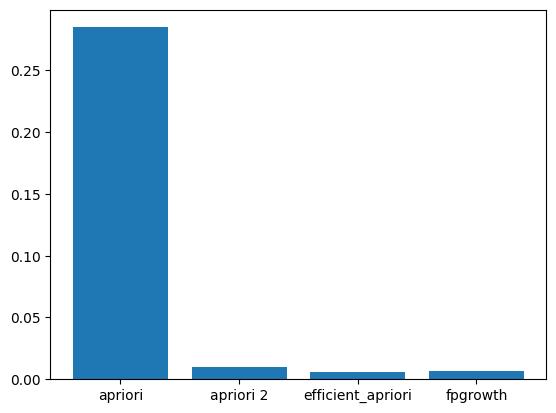

In [31]:
print('Время выполнения apriori: ', t[0], '\n')
print('Время выполнения apriori2: ', t[1], '\n')
print('Время выполнения efficient_apriori: ', t[2], '\n')
print('Время выполнения fpgrowth: ', t[3], '\n')
plt.bar(['apriori','apriori 2','efficient_apriori', 'fpgrowth'], t)
plt.show()